# Quantification of Differential Structures
This notebook shows methods of quantification of differential structures using Gray-Level Co-Occurrence Matrix (GLCM) and Haralick features

In [5]:
# Necessary imports
from functions import *
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

## Gray-Level Co-Occurrence Matrix (GLCM)
GLCM describes adjacency of pixels. Algorithm looks for pairs of pixels and creates new matrix (GLCM) using this information. Below image shows how GLCM is constructed.

<img src="GLCM_schema.png" />

There are four types of GLCM matrices. The difference between them is order of pixel comparasion. Example above uses "Left-to-Right" comparasion which means that pixel on the left side (lower horizontal coordinate) is compared with pixel on right side (higher horizontal coordinate).

Four types of adjacency are as follows:
<ul>
<li>Left-to-right</li>
<li>Top-to-bottom</li>
<li>Top left-to-bottom right</li>
<li>Top right-to-bottom lef</li>
</ul>

All of these typyes of GLCM are calculated by functions below.

In [6]:
# Calculate GLCM matrix using Left-to-right method
# @img - source image
#
# @return GLCM - calculated GLCM matrix
def GLCM_LR(img):
    max_img = max(img.flatten())
    GLCM = np.zeros((max_img,max_img))
    
    for x in range(1, img.shape[0]):
        for y in range(0, img.shape[1]):
            GLCM[img[x][y] - 1][img[x-1][y] - 1] += 1           
    return GLCM


# Calculate GLCM matrix using Top-to-bottom method
# @img - source image
#
# @return GLCM - calculated GLCM matrix
def GLCM_TB(img):
    max_img = max(img.flatten())
    GLCM = np.zeros((max_img,max_img))
    
    for x in range(0, img.shape[0]):
        for y in range(1, img.shape[1]):
            GLCM[img[x][y] - 1][img[x][y-1] - 1] += 1
            
    return GLCM


# Calculate GLCM matrix using Top left-to-bottom right method
# @img - source image
#
# @return GLCM - calculated GLCM matrix
def GLCM_TL_BR(img):
    max_img = max(img.flatten())
    GLCM = np.zeros((max_img,max_img))
    
    for x in range(1, img.shape[0]):
        for y in range(1, img.shape[1]):
            GLCM[img[x][y] - 1][img[x-1][y-1] - 1] += 1
                          
    return GLCM


# Calculate GLCM matrix using Top right-to-bottom left method
# @img - source image
#
# @return GLCM - calculated GLCM matrix
def GLCM_TR_BL(img):
    max_img = max(img.flatten())
    GLCM = np.zeros((max_img,max_img))
    
    for x in range(img.shape[0]-2, 0, -1):
        for y in range(img.shape[1]-2, 0, -1):
            GLCM[img[x][y] - 1][img[x+1][y-1] - 1] += 1
                
    return GLCM

## Using GLCM matrices
Figures below shows visual representation of GLCM matrices

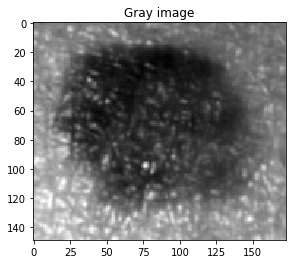

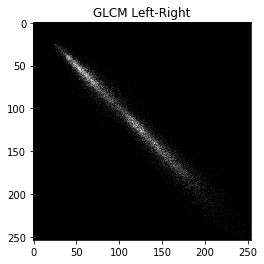

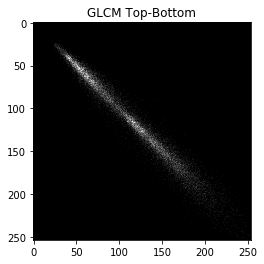

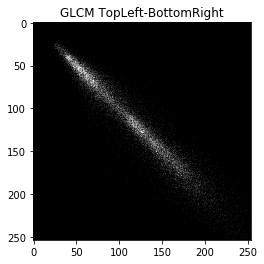

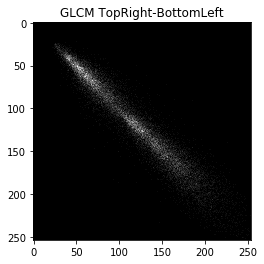

In [7]:
img = cv2.imread('39.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_glcm_lr = GLCM_LR(img_gray)
img_glcm_tb = GLCM_TB(img_gray)
img_glcm_tl_br = GLCM_TL_BR(img_gray)
img_glcm_tr_bl = GLCM_TR_BL(img_gray)

simg(img_gray, "Gray image")
simg(img_glcm_lr, "GLCM Left-Right")
simg(img_glcm_tb, "GLCM Top-Bottom")
simg(img_glcm_tl_br, "GLCM TopLeft-BottomRight")
simg(img_glcm_tr_bl, "GLCM TopRight-BottomLeft")

## Calculating Haralick features
Haralick features are statistics computed from GLCM matrices. They are useful for describing texture of image. For lesion detection we uses four of them:
<ul>
<li>Energy</li>
<li>Homogeneity</li>
<li>Correlation</li>
<li>Contrast</li>
</ul>


## Calculating Energy
Energy is computed with following formula:
$$E = \sum_{i,j} D_{s}(i, j)^{2}$$
where $D_{s}$ is GLCM matrix and $i, j$ are indexes of GLCM matrix.

In [8]:
# Calculate Energy E
E_LR = np.sum(img_glcm_lr*img_glcm_lr)
print("E_LR = {}".format(E_LR))

E_TB = np.sum(img_glcm_tb*img_glcm_tb)
print("E_TB = {}".format(E_TB))

E_TL_BR = np.sum(img_glcm_tl_br*img_glcm_tl_br)
print("E_TL_BR = {}".format(E_TL_BR))

E_TR_BL = np.sum(img_glcm_tr_bl*img_glcm_tr_bl)
print("E_TR_BL = {}".format(E_TR_BL))

E_LR = 192510.0
E_TB = 197844.0
E_TL_BR = 154102.0
E_TR_BL = 141095.0


## Calculating Homogeneity
Homogeneity is computed with following formula:
$$H = \sum_{i,j} \frac{D_{s}(i, j)}{1 + |i - j|}$$
where $D_{s}$ is GLCM matrix and $i, j$ are indexes of GLCM matrix.

In [9]:
# Calculate homogeneity H
# @glcm - GLCM source matrix
#
# @return H_sum - computed H value
def calc_H(glcm):
    H_sum = 0
    for i in range(0, glcm.shape[0]):
        for j in range(0, glcm.shape[1]):
            H_sum += (glcm[i][j])/(1 + abs(i - j))
    return H_sum

H_LR = calc_H(img_glcm_lr)
print("H_LR = {}".format(H_LR))

H_TB = calc_H(img_glcm_tb)
print("H_TB = {}".format(H_TB))

H_TL_BR = calc_H(img_glcm_tl_br)
print("H_TL_BR = {}".format(H_TL_BR))

H_TR_BL = calc_H(img_glcm_tr_bl)
print("H_TR_BL = {}".format(H_TR_BL))

H_LR = 6774.515355291039
H_TB = 6827.74988229812
H_TL_BR = 5749.470862901801
H_TR_BL = 5357.518389604144


## Calculating Correlation
Correlation is computed with following formula:
$$C_{cor} = \sum_{i,j} \frac{(i - \mu_{i})(j - \mu_{j})D_{s}(i,j)}{\sigma_{i}\sigma_{j}}$$
where $D_{s}$ is GLCM matrix, $i, j$ are indexes of GLCM matrix, $\mu_{i}$, $\mu_{j}$, $\sigma_{i}$ and $\sigma_{j}$ are the means and the standard deviations of GLCM.

In [10]:
# Calculate correlation Cor
# @glcm - GLCM source matrix
#
# @return Cor_sum - computed Cor value
def calc_Cor(glcm):
    u_i = 0
    u_j = 0
    for i in range(0, glcm.shape[0]):
        for j in range(0, glcm.shape[1]):
            u_i += i*glcm[i][j]
            u_j += j*glcm[i][j]
    
    o_i = 0
    o_j = 0
    for i in range(0, glcm.shape[0]):
        for j in range(0, glcm.shape[1]):
            o_i += ((i - u_i)**2)*glcm[i][j]
            o_j += ((j - u_j)**2)*glcm[i][j]
    
    o_i = math.sqrt(o_i)
    o_j = math.sqrt(o_j)
    
    Cor_sum = 0
    for i in range(0, glcm.shape[0]):
        for j in range(0, glcm.shape[1]):
            Cor_sum += ((i - u_i)*(j - u_j)*glcm[i][j])/(o_i*o_j)
            
    return Cor_sum
    
    
    
    
Cor_LR = calc_Cor(img_glcm_lr)
print("Cor_LR = {}".format(Cor_LR))

Cor_TB = calc_Cor(img_glcm_tb)
print("Cor_LR = {}".format(Cor_TB))

Cor_TL_BR = calc_Cor(img_glcm_tl_br)
print("Cor_LR = {}".format(Cor_TL_BR))

Cor_TR_BL = calc_Cor(img_glcm_tr_bl)
print("Cor_LR = {}".format(Cor_TR_BL))

Cor_LR = 0.9999999999955312
Cor_LR = 0.9999999999954171
Cor_LR = 0.9999999999919339
Cor_LR = 0.9999999999907166


## Calculating Contrast
Contrast is computed with following formula:
$$C_{con} = \sum_{i,j} |i - j|^{2} D_{s}(i,j) $$
where $D_{s}$ is GLCM matrix and $i, j$ are indexes of GLCM matrix.

In [11]:
# Calculate Contrast Con
# @glcm - GLCM source matrix
#
# @return Con - computed Con value
def calc_Con(glcm):
    Con_sum = 0
    for i in range(0, glcm.shape[0]):
        for j in range(0, glcm.shape[1]):
            Con_sum += (abs(i - j)**2)*glcm[i][j]
    return Con_sum
            
            
Con_LR = calc_Con(img_glcm_lr)
print("Con_LR = {}".format(Con_LR))

Con_TB = calc_Con(img_glcm_tb)
print("Con_LR = {}".format(Con_TB))

Con_TL_BR = calc_Con(img_glcm_tl_br)
print("Con_LR = {}".format(Con_TL_BR))

Con_TR_BL = calc_Con(img_glcm_tr_bl)
print("Con_LR = {}".format(Con_TR_BL))

Con_LR = 1954904.0
Con_LR = 2010430.0
Con_LR = 3442367.0
Con_LR = 3809385.0


## Mean values
Mean values of parameters computed above are useful in melanoma detection.

In [12]:
# Means
E_mean = (E_LR + E_TB + E_TL_BR + E_TR_BL)/4
print("E_mean = {}".format(E_mean))

H_mean = (H_LR + H_TB + H_TL_BR + H_TR_BL)/4
print("H_mean = {}".format(H_mean))

Cor_mean = (Cor_LR + Cor_TB + Cor_TL_BR + Cor_TR_BL)/4
print("Cor_mean = {}".format(Cor_mean))

Con_mean = (Con_LR + Con_TB + Con_TL_BR + Con_TR_BL)/4
print("Con_mean = {}".format(Con_mean))

E_mean = 171387.75
H_mean = 6177.313622523777
Cor_mean = 0.9999999999933997
Con_mean = 2804271.5
